<a href="https://colab.research.google.com/github/DangPhan23/AI_W6_10_03_2023/blob/main/AI_W6_10_3_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
setpoint=ctrl.Antecedent(np.arange(18,31,1),'setpoint')
val=ctrl.Antecedent(np.arange(-5,61,1),'val')
pwm=ctrl.Consequent(np.arange(0,11,1),'pwm')

setpoint['low']=fuzz.trimf(setpoint.universe,[18,18,24])
setpoint['medium']=fuzz.trimf(setpoint.universe,[18,24,30])
setpoint['hight']=fuzz.trimf(setpoint.universe,[24,30,30])

val['verylow']=fuzz.trimf(val.universe,[-5,-5,30])
val['low']=fuzz.trimf(val.universe,[-5,10,30])
val['medium']=fuzz.trimf(val.universe,[30,50,60])
val['hight']=fuzz.trimf(val.universe,[20,30,40])
val['veryhight']=fuzz.trimf(val.universe,[30,60,60])

pwm['verylow']=fuzz.trimf(pwm.universe,[0,0,5])
pwm['low']=fuzz.trimf(pwm.universe,[0,5,10])
pwm['medium']=fuzz.trimf(pwm.universe,[0,5,10])
pwm['hight']=fuzz.trimf(pwm.universe,[5,10,10])
pwm['veryhight']=fuzz.trimf(pwm.universe,[0,0,5])

rule1=ctrl.Rule(setpoint['low']&val['verylow'],pwm['verylow'])
rule2=ctrl.Rule(setpoint['low']&val['low'],pwm['verylow'])
rule3=ctrl.Rule(setpoint['low']&val['medium'],pwm['verylow'])
rule4=ctrl.Rule(setpoint['low']&val['hight'],pwm['low'])
rule5=ctrl.Rule(setpoint['low']&val['veryhight'],pwm['hight'])

rule6=ctrl.Rule(setpoint['medium']&val['verylow'],pwm['low'])
rule7=ctrl.Rule(setpoint['medium']&val['low'],pwm['low'])
rule8=ctrl.Rule(setpoint['medium']&val['medium'],pwm['medium'])
rule9=ctrl.Rule(setpoint['medium']&val['hight'],pwm['medium'])
rule10=ctrl.Rule(setpoint['medium']&val['veryhight'],pwm['veryhight'])

rule11=ctrl.Rule(setpoint['hight']&val['verylow'],pwm['low'])
rule12=ctrl.Rule(setpoint['hight']&val['low'],pwm['medium'])
rule13=ctrl.Rule(setpoint['hight']&val['medium'],pwm['hight'])
rule14=ctrl.Rule(setpoint['hight']&val['hight'],pwm['hight'])
rule15=ctrl.Rule(setpoint['hight']&val['veryhight'],pwm['veryhight'])

pwming_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
pwming=ctrl.ControlSystemSimulation(pwming_ctrl)
pwming.input['setpoint']=20
pwming.input['val']=10
pwming.compute()
print(pwming.output['pwm'])
pwm.view(sim=pwming)

setpoint.view()
val.view()
pwm.view()

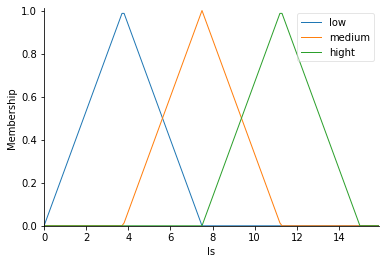

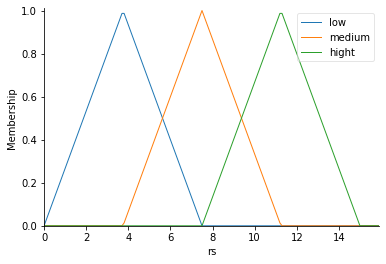

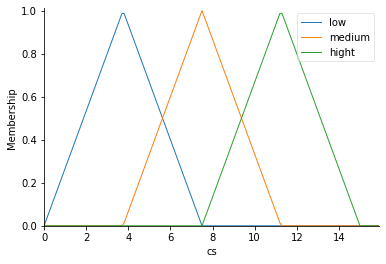

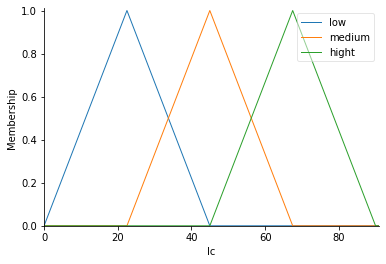

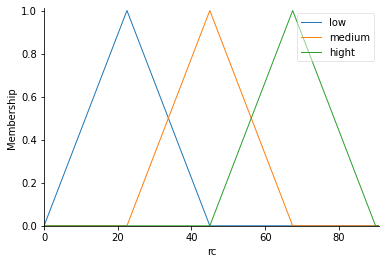

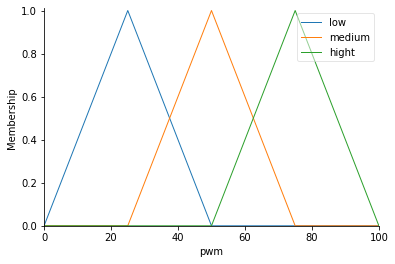

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
ls=ctrl.Antecedent(np.arange(0,16,0.1),'ls')
rs=ctrl.Antecedent(np.arange(0,16,0.1),'rs')
cs=ctrl.Antecedent(np.arange(0,16,0.1),'cs')
lc=ctrl.Antecedent(np.arange(0,91,0.1),'lc')
rc=ctrl.Antecedent(np.arange(0,91,0.1),'rc')
pwm=ctrl.Consequent(np.arange(0,101,1),'pwm')

ls['low']=fuzz.trimf(ls.universe,[0,3.75,7.5])
ls['medium']=fuzz.trimf(ls.universe,[3.75,7.5,11.25])
ls['hight']=fuzz.trimf(ls.universe,[7.5,11.25,15])

rs['low']=fuzz.trimf(ls.universe,[0,3.75,7.5])
rs['medium']=fuzz.trimf(ls.universe,[3.75,7.5,11.25])
rs['hight']=fuzz.trimf(ls.universe,[7.5,11.25,15])

cs['low']=fuzz.trimf(ls.universe,[0,3.75,7.5])
cs['medium']=fuzz.trimf(ls.universe,[3.75,7.5,11.25])
cs['hight']=fuzz.trimf(ls.universe,[7.5,11.25,15])

lc['low']=fuzz.trimf(lc.universe,[0,22.5,45])
lc['medium']=fuzz.trimf(lc.universe,[22.5,45,67.5])
lc['hight']=fuzz.trimf(lc.universe,[45,67.5,90])

rc['low']=fuzz.trimf(rc.universe,[0,22.5,45])
rc['medium']=fuzz.trimf(rc.universe,[22.5,45,67.5])
rc['hight']=fuzz.trimf(rc.universe,[45,67.5,90])

pwm['low']=fuzz.trimf(pwm.universe,[0,25,50])
pwm['medium']=fuzz.trimf(pwm.universe,[25,50,75])
pwm['hight']=fuzz.trimf(pwm.universe,[50,75,100])

rule1=ctrl.Rule(ls['low']&cs['low'],lc['low'])
rule2=ctrl.Rule(ls['low']&cs['medium'],lc['low'])
rule3=ctrl.Rule(ls['low']&cs['hight'],lc['medium'])

rule4=ctrl.Rule(ls['medium']&cs['low'],lc['low'])
rule5=ctrl.Rule(ls['medium']&cs['medium'],lc['medium'])
rule6=ctrl.Rule(ls['medium']&cs['hight'],lc['medium'])

rule7=ctrl.Rule(ls['hight']&cs['low'],lc['medium'])
rule8=ctrl.Rule(ls['hight']&cs['medium'],lc['medium'])
rule9=ctrl.Rule(ls['hight']&cs['hight'],lc['hight'])

rule10=ctrl.Rule(rs['low']&cs['low'],rc['low'])
rule11=ctrl.Rule(rs['low']&cs['medium'],rc['low'])
rule12=ctrl.Rule(rs['low']&cs['hight'],rc['medium'])

rule13=ctrl.Rule(rs['medium']&cs['low'],rc['low'])
rule14=ctrl.Rule(rs['medium']&cs['medium'],rc['medium'])
rule15=ctrl.Rule(rs['medium']&cs['hight'],rc['medium'])

rule16=ctrl.Rule(rs['hight']&cs['low'],rc['medium'])
rule17=ctrl.Rule(rs['hight']&cs['medium'],rc['medium'])
rule18=ctrl.Rule(rs['hight']&cs['hight'],rc['hight'])

rule19=ctrl.Rule(rc['low']&lc['low'],pwm['low'])
rule20=ctrl.Rule(rc['low']&lc['medium'],pwm['low'])
rule21=ctrl.Rule(rc['low']&lc['hight'],pwm['low'])

rule22=ctrl.Rule(rc['medium']&lc['low'],pwm['low'])
rule23=ctrl.Rule(rc['medium']&lc['medium'],pwm['low'])
rule24=ctrl.Rule(rc['medium']&lc['hight'],pwm['low'])

rule25=ctrl.Rule(rc['hight']&lc['low'],pwm['low'])
rule26=ctrl.Rule(rc['hight']&lc['medium'],pwm['low'])
rule27=ctrl.Rule(rc['hight']&lc['hight'],pwm['low'])

ls.view()
rs.view()
cs.view()
lc.view()
rc.view()
pwm.view()